In [1]:
from nldg.utils import *
import matplotlib.pyplot as plt
import os

In [2]:
def plot_dtr(dtr, optfun=None, nameplot='setting1'):
    line_colors = ["lightskyblue", "orange", "plum", "yellowgreen", "royalblue", "darkred", "mediumpurple"]
    data_colors = ["black", "grey", "silver"]
    environments = sorted(dtr["E"].unique())

    fig, ax = plt.subplots(figsize=(8, 5))
    for idx, env in enumerate(environments):
        marker_style = "o"
        ax.scatter(
            dtr[dtr["E"] == env]["X"],
            dtr[dtr["E"] == env]["Y"],
            color=data_colors[idx],
            marker=marker_style,
            alpha=0.5,
            s=30,
            label=f"Env {env + 1}",
        )
    ax.plot(dtr["X_sorted"], dtr["fitted_rf"], color=line_colors[0], linewidth=2, label="RF",)
    ax.plot(dtr["X_sorted"], dtr["fitted_magging"], color=line_colors[1], linewidth=2, label="MaggingRF",)
    ax.plot(dtr["X_sorted"], dtr["fitted_minmax_m0"], color=line_colors[2], linewidth=2, label="L-MMRF",)
    ax.plot(dtr["X_sorted"], dtr["fitted_minmax_m1"], color=line_colors[3], linewidth=2, label="Post-RF",)
    ax.plot(dtr["X_sorted"], dtr["fitted_minmax_m2"], color=line_colors[4], linewidth=2, label="Post-L-MMRF",)
    ax.plot(dtr["X_sorted"], dtr["fitted_minmax_m3"], color=line_colors[5], linewidth=2, label="G-DFS-MMRF",)
    ax.plot(dtr["X_sorted"], dtr["fitted_minmax_m4"], color=line_colors[6], linewidth=2, label="G-MMRF",)

    if optfun == 1:
        x_range = np.linspace(dtr["X_sorted"].min(), dtr["X_sorted"].max(), 1000)
        y_opt = 0.8 * np.sin(x_range / 2) ** 2 + 3
        ax.plot(x_range, y_opt, color="orangered", linewidth=2, label="Oracle", linestyle="--",)
    elif optfun == 2:
        x_range = np.linspace(dtr["X_sorted"].min(), dtr["X_sorted"].max(), 1000)
        y_opt = np.where(x_range > 0, 2.4 * x_range, -2.4 * x_range)
        ax.plot(x_range, y_opt, color="orangered", linewidth=2, label="Oracle", linestyle="--",)
    elif optfun == 3:
        x_range = np.linspace(dtr["X_sorted"].min(), dtr["X_sorted"].max(), 1000)
        y_opt = np.where(x_range > 0, 1.75 * x_range, 1.75 * x_range)
        ax.plot(x_range, y_opt, color="orangered", linewidth=2, label="Oracle", linestyle="--",)

    ax.set_xlabel("$X$")
    ax.set_ylabel("$Y$")
    ax.grid(True, linewidth=0.2)

    handles, labels = ax.get_legend_handles_labels()

    ax.legend(
        handles=handles,
        loc="upper center",
        bbox_to_anchor=(0.5, -0.15),
        ncol=5,  # Adjust depending on how many entries you have
        frameon=False
    )

    plt.tight_layout()

    script_dir = os.getcwd()
    parent_dir = os.path.abspath(os.path.join(script_dir, ".."))
    plots_dir = os.path.join(parent_dir, "results", "figures")
    os.makedirs(plots_dir, exist_ok=True)
    outpath = os.path.join(plots_dir, f"{nameplot}.png")
    plt.savefig(outpath, dpi=300, bbox_inches="tight")
    # plt.savefig(f"{nameplot}.png", dpi=300, bbox_inches="tight")

    plt.show()

## Setting 1

In [3]:
dtr = gen_data_v2(n=1000, random_state=42)
Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr = np.array(dtr['Y'])
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)

preds_rf = pd.read_csv('results/s1_m0.csv')['fitted_rf']
preds_magging = pd.read_csv('results/s1_m0.csv')['fitted_magging']
preds_m0 = pd.read_csv('results/s1_m0.csv')['fitted_maximin']
preds_m1 = pd.read_csv('results/s1_m1.csv')['fitted_maximin']
preds_m2 = pd.read_csv('results/s1_m2.csv')['fitted_maximin']
preds_m3 = pd.read_csv('results/s1_m3.csv')['fitted_maximin']
preds_m4 = pd.read_csv('results/s1_m4.csv')['fitted_maximin']

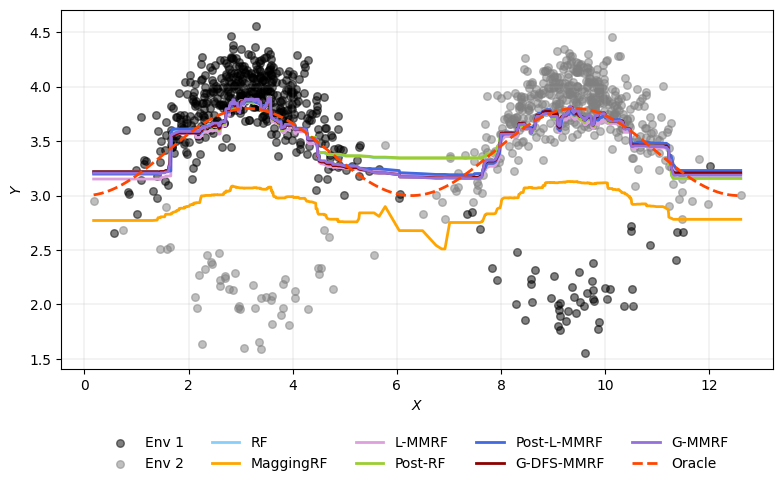

In [4]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_rf"] = preds_rf
dtr["fitted_magging"] = preds_magging
dtr["fitted_minmax_m0"] = preds_m0
dtr["fitted_minmax_m1"] = preds_m1
dtr["fitted_minmax_m2"] = preds_m2
dtr["fitted_minmax_m3"] = preds_m3
dtr["fitted_minmax_m4"] = preds_m4

plot_dtr(dtr, optfun=1)

## Setting 2

In [5]:
dtr = gen_data_v3(n=1000, setting=2)
Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr = np.array(dtr['Y'])
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)

preds_rf = pd.read_csv('results/s2_m0.csv')['fitted_rf']
preds_magging = pd.read_csv('results/s2_m0.csv')['fitted_magging']
preds_m0 = pd.read_csv('results/s2_m0.csv')['fitted_maximin']
preds_m1 = pd.read_csv('results/s2_m1.csv')['fitted_maximin']
preds_m2 = pd.read_csv('results/s2_m2.csv')['fitted_maximin']
preds_m3 = pd.read_csv('results/s2_m3.csv')['fitted_maximin']
preds_m4 = pd.read_csv('results/s2_m4.csv')['fitted_maximin']

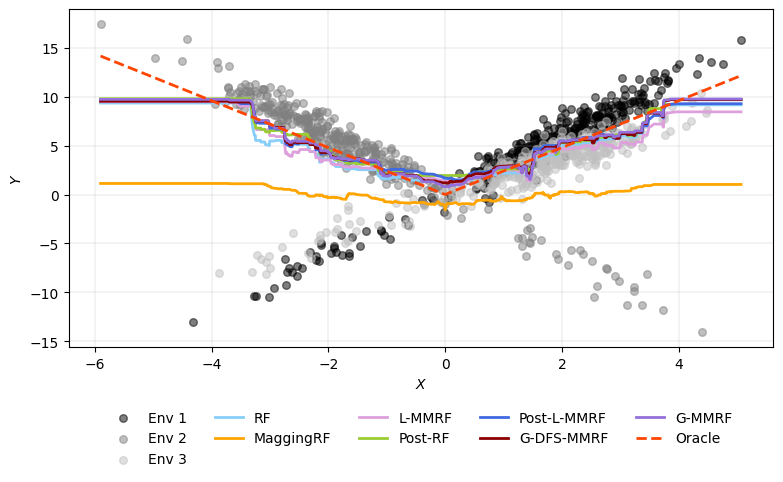

In [6]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_rf"] = preds_rf
dtr["fitted_magging"] = preds_magging
dtr["fitted_minmax_m0"] = preds_m0
dtr["fitted_minmax_m1"] = preds_m1
dtr["fitted_minmax_m2"] = preds_m2
dtr["fitted_minmax_m3"] = preds_m3
dtr["fitted_minmax_m4"] = preds_m4

plot_dtr(dtr, optfun=2, nameplot="setting2")

## Setting 3

In [7]:
dtr = gen_data_v4(n_easy=500, n_hard=500)
Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr = np.array(dtr['Y'])
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)

preds_rf = pd.read_csv('results/s3_m0.csv')['fitted_rf']
preds_magging = pd.read_csv('results/s3_m0.csv')['fitted_magging']
preds_m0 = pd.read_csv('results/s3_m0.csv')['fitted_maximin']
preds_m1 = pd.read_csv('results/s3_m1.csv')['fitted_maximin']
preds_m2 = pd.read_csv('results/s3_m2.csv')['fitted_maximin']
preds_m3 = pd.read_csv('results/s3_m3.csv')['fitted_maximin']
preds_m4 = pd.read_csv('results/s3_m4.csv')['fitted_maximin']

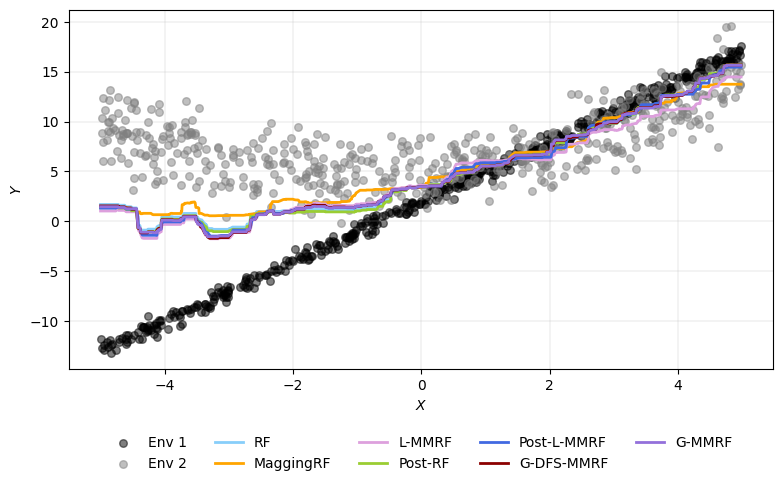

In [8]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_rf"] = preds_rf
dtr["fitted_magging"] = preds_magging
dtr["fitted_minmax_m0"] = preds_m0
dtr["fitted_minmax_m1"] = preds_m1
dtr["fitted_minmax_m2"] = preds_m2
dtr["fitted_minmax_m3"] = preds_m3
dtr["fitted_minmax_m4"] = preds_m4

plot_dtr(dtr, nameplot="setting3")

## Setting 4

In [9]:
dtr = gen_data_v5(n_samples=1000, adv_fraction=0.5, noise_var_env2=10.0)
Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr = np.array(dtr['Y'])
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)

preds_rf = pd.read_csv('results/s4_m0.csv')['fitted_rf']
preds_magging = pd.read_csv('results/s4_m0.csv')['fitted_magging']
preds_m0 = pd.read_csv('results/s4_m0.csv')['fitted_maximin']
preds_m1 = pd.read_csv('results/s4_m1.csv')['fitted_maximin']
preds_m2 = pd.read_csv('results/s4_m2.csv')['fitted_maximin']
preds_m3 = pd.read_csv('results/s4_m3.csv')['fitted_maximin']
preds_m4 = pd.read_csv('results/s4_m4.csv')['fitted_maximin']

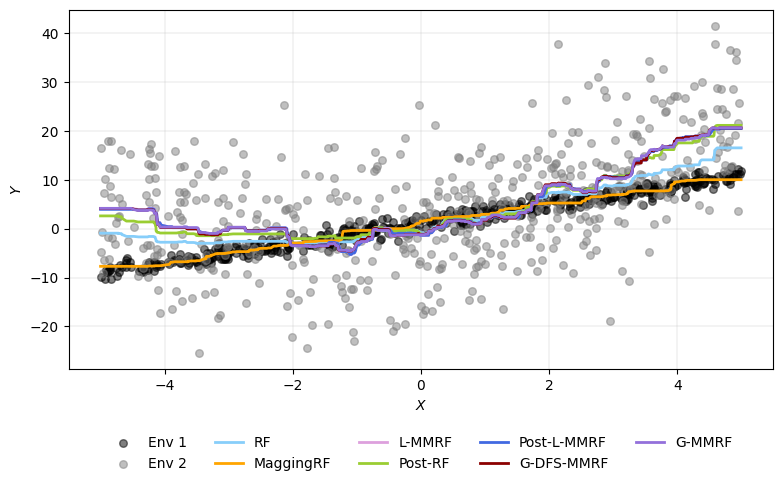

In [10]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_rf"] = preds_rf
dtr["fitted_magging"] = preds_magging
dtr["fitted_minmax_m0"] = preds_m0
dtr["fitted_minmax_m1"] = preds_m1
dtr["fitted_minmax_m2"] = preds_m2
dtr["fitted_minmax_m3"] = preds_m3
dtr["fitted_minmax_m4"] = preds_m4

plot_dtr(dtr, nameplot="setting4")

## Setting 5

In [11]:
dtr = gen_data_v6(n=1000, noise_std=0.5)
Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr = np.array(dtr['Y'])
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)

preds_rf = pd.read_csv('results/s5_m0.csv')['fitted_rf']
preds_magging = pd.read_csv('results/s5_m0.csv')['fitted_magging']
preds_m0 = pd.read_csv('results/s5_m0.csv')['fitted_maximin']
preds_m1 = pd.read_csv('results/s5_m1.csv')['fitted_maximin']
preds_m2 = pd.read_csv('results/s5_m2.csv')['fitted_maximin']
preds_m3 = pd.read_csv('results/s5_m3.csv')['fitted_maximin']
preds_m4 = pd.read_csv('results/s5_m4.csv')['fitted_maximin']

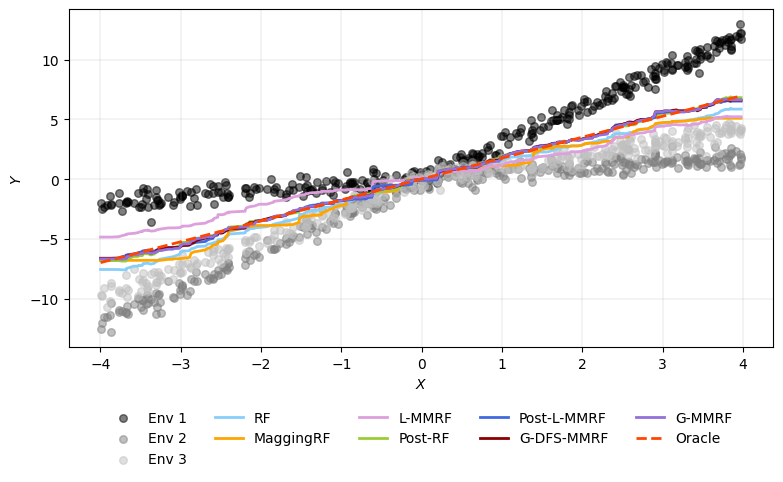

In [12]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_rf"] = preds_rf
dtr["fitted_magging"] = preds_magging
dtr["fitted_minmax_m0"] = preds_m0
dtr["fitted_minmax_m1"] = preds_m1
dtr["fitted_minmax_m2"] = preds_m2
dtr["fitted_minmax_m3"] = preds_m3
dtr["fitted_minmax_m4"] = preds_m4

plot_dtr(dtr, optfun=3, nameplot="setting5")

## Setting 6

In [13]:
dtr = gen_data_v7(n=1500)
Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr = np.array(dtr['Y'])
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)

preds_rf = pd.read_csv('results/s6_m0.csv')['fitted_rf']
preds_magging = pd.read_csv('results/s6_m0.csv')['fitted_magging']
preds_m0 = pd.read_csv('results/s6_m0.csv')['fitted_maximin']
preds_m1 = pd.read_csv('results/s6_m1.csv')['fitted_maximin']
preds_m2 = pd.read_csv('results/s6_m2.csv')['fitted_maximin']
preds_m3 = pd.read_csv('results/s6_m3.csv')['fitted_maximin']
preds_m4 = pd.read_csv('results/s6_m4.csv')['fitted_maximin']

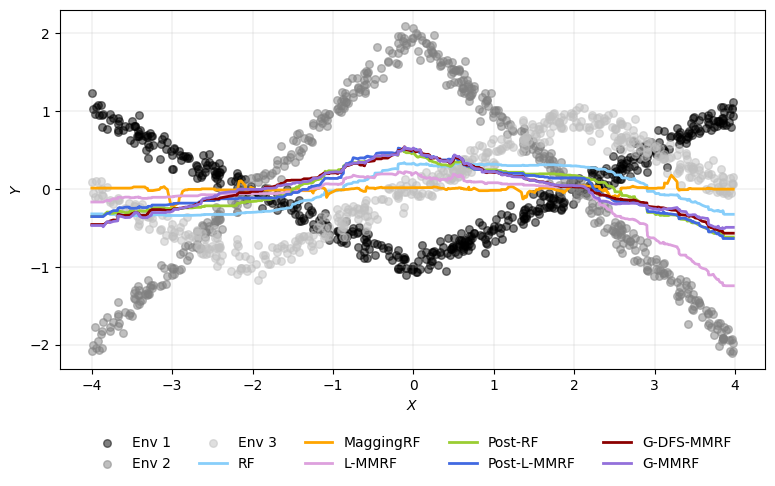

In [14]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_rf"] = preds_rf
dtr["fitted_magging"] = preds_magging
dtr["fitted_minmax_m0"] = preds_m0
dtr["fitted_minmax_m1"] = preds_m1
dtr["fitted_minmax_m2"] = preds_m2
dtr["fitted_minmax_m3"] = preds_m3
dtr["fitted_minmax_m4"] = preds_m4

plot_dtr(dtr, nameplot="setting6")

## Setting 7

In [15]:
dtr = gen_data_v8(n=1500)
Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr = np.array(dtr['Y'])
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)

preds_rf = pd.read_csv('results/s7_m0.csv')['fitted_rf']
preds_magging = pd.read_csv('results/s7_m0.csv')['fitted_magging']
preds_m0 = pd.read_csv('results/s7_m0.csv')['fitted_maximin']
preds_m1 = pd.read_csv('results/s7_m1.csv')['fitted_maximin']
preds_m2 = pd.read_csv('results/s7_m2.csv')['fitted_maximin']
preds_m3 = pd.read_csv('results/s7_m3.csv')['fitted_maximin']
preds_m4 = pd.read_csv('results/s7_m4.csv')['fitted_maximin']

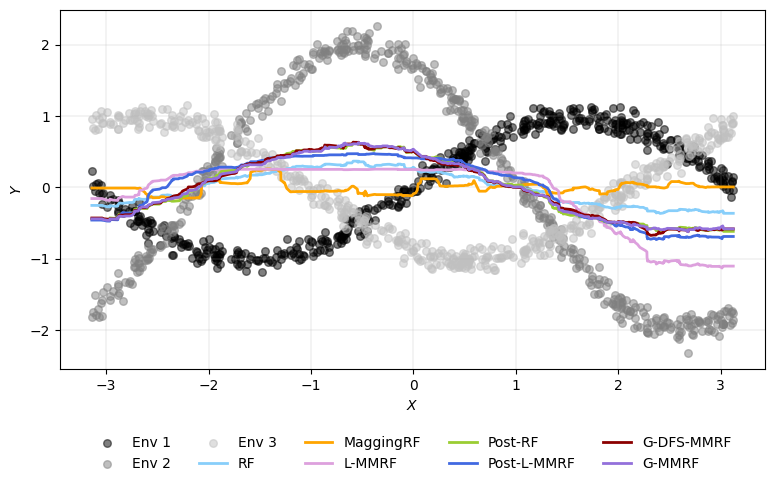

In [16]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_rf"] = preds_rf
dtr["fitted_magging"] = preds_magging
dtr["fitted_minmax_m0"] = preds_m0
dtr["fitted_minmax_m1"] = preds_m1
dtr["fitted_minmax_m2"] = preds_m2
dtr["fitted_minmax_m3"] = preds_m3
dtr["fitted_minmax_m4"] = preds_m4

plot_dtr(dtr, nameplot="setting7")